# Load and Import Libraries

In [209]:
import hashlib
from PIL import Image
import imagehash
import os
import datetime
import pandas as pd
import numpy as np  # Add this import to resolve the error
import matplotlib.pyplot as plt  # You also need to import matplotlib for plotting
import pprint
from IPython.display import display
import seaborn as sns

# Load Images from Directory and Compute Cryptographic Hash Methods Implemented and Tested

## Function to Load Images from Directory

In [212]:
def load_images_from_directory(directory_path):
    images = []
    failed_files = []  # To track files that couldn't be loaded
    
    # List all files in the directory
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        
        # Check if the file is an image (based on file extension)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            try:
                # Open the image using Pillow
                img = Image.open(file_path)
                img.verify()  # Verify the image file integrity
                images.append(file_path)  # Save the file path instead of the image object
                print(f"Loaded: {filename}")
            except Exception as e:
                failed_files.append((filename, str(e)))
                print(f"Error loading {filename}: {e}")
    
    # Summary
    print("\nSummary:")
    print(f"Total images loaded: {len(images)}")
    print(f"Failed to load: {len(failed_files)}")
    if failed_files:
        print("\nFailed Files:")
        for file, error in failed_files:
            print(f"{file}: {error}")
    
    return images


## Function to Compute Cryptographic Hashes

In [214]:
# Function to compute SHA-256 hash for an image
def compute_cryptographic_hash(image_path):
    hash_sha256 = hashlib.sha256()  # Initialize SHA-256 hash object
    
    try:
        # Open the image file in binary mode
        with open(image_path, 'rb') as img_file:
            # Read the image in chunks to avoid memory issues with large files
            while chunk := img_file.read(8192):
                hash_sha256.update(chunk)  # Update the hash with each chunk of data
        
        return hash_sha256.hexdigest()  # Return the hexadecimal representation of the hash
    
    except Exception as e:
        print(f"Error computing hash for {image_path}: {e}")
        return None


## Testing of Loaded Image and Cryptographic Hash

In [216]:
# Directory path where images are stored
directory_path = r"C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files"

# Load the images from the directory
image_paths = load_images_from_directory(directory_path)


Loaded: 1.jpg
Loaded: 10.jpg
Loaded: 11.jpg
Loaded: 12.jpg
Loaded: 13.jpg
Loaded: 14.jpg
Loaded: 15.jpg
Loaded: 16.jpg
Loaded: 17.jpg
Loaded: 18.jpg
Loaded: 19.jpg
Loaded: 2.jpg
Loaded: 20.jpg
Loaded: 21.jpg
Loaded: 22.jpg
Loaded: 23.jpg
Loaded: 24.jpg
Loaded: 25.jpg
Loaded: 26.jpg
Loaded: 27.jpg
Loaded: 28.jpg
Loaded: 29.jpg
Loaded: 3.jpg
Loaded: 30.jpg
Loaded: 31.jpg
Loaded: 32.jpg
Loaded: 33.jpg
Loaded: 34.jpg
Loaded: 35.jpg
Loaded: 36.jpg
Loaded: 37.jpg
Loaded: 38.jpg
Loaded: 4.jpg
Loaded: 5.jpg
Loaded: 6.jpg
Loaded: 7.jpg
Loaded: 8.jpg
Loaded: 9.jpg

Summary:
Total images loaded: 38
Failed to load: 0


In [217]:
# Compute hash for each image and print
cryptographic_hashes = {}
for image_path in image_paths:
    img_hash = compute_cryptographic_hash(image_path)
    if img_hash:
        cryptographic_hashes[image_path] = img_hash
        print(f"Hash for {image_path}: {img_hash}")

# Example: Display all computed hashes
if cryptographic_hashes:
    print("Image hashes could be computed:")
else:
    print("No images found or hashes could not be computed.")


Hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\1.jpg: 1f1a20e54273cf20d5342de29e7591b829cede977040303bc8cd73aac871212d
Hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\10.jpg: 0046be088fdafdb8d921d937ce11973058b21d8f26a974d4009d6d267075fb44
Hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\11.jpg: b36aa0e46beed02075688769da64b35b73fbf36a6a2d46eaafe86244846461d6
Hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\12.jpg: ed93c56ca71f42a1401d28f99e83cd74e54f50443f2c3c182186c5763f4727ee
Hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\13.jpg: 61bce4170da81925367811ea80a38cbaf19bca71abad2a2ea07790662fb8048f
Hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\14.jpg: ae2a1aefeb8fa1b355096cd1105e818a28cfe5aa

## Function to Compute Perceptual Hashes

In [219]:
# Function to compute perceptual hash for an image
def compute_perceptual_hash(image):
    try:
        # Convert image to RGB (in case it's not in RGB format)
        image = image.convert('RGB')
        
        # Compute the perceptual hash using average hash method
        perceptual_hash = imagehash.average_hash(image)
        
        return perceptual_hash
    
    except Exception as e:
        print(f"Error computing perceptual hash: {e}")
        return None


In [220]:
# Print perceptual hashes for all images
perceptual_hashes = {}
for image_path in image_paths:
    try:
        # Open the image using Pillow
        with Image.open(image_path) as img:
            # Compute perceptual hash for the image
            perceptual_hash = compute_perceptual_hash(img)
            if perceptual_hash:
                perceptual_hashes[image_path] = perceptual_hash
                print(f"Perceptual hash for {image_path}: {perceptual_hash}")
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")


Perceptual hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\1.jpg: 3f3b380d1e3c6400
Perceptual hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\10.jpg: 0040f8fcfeffffff
Perceptual hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\11.jpg: 3f3f3f7736220000
Perceptual hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\12.jpg: 00083f1f071f3f0f
Perceptual hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\13.jpg: 0000446ceefcfcfc
Perceptual hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\14.jpg: 002078307cfefcfc
Perceptual hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\15.jpg: e0f4fefcf4f02000
Perceptual hash for C:\Users\pc\Documents\DIGITAL ENGINEERING\W

## Creating Instances of Images and Computing Perceptual Hashes

In [222]:
# Function to create three instances of an image and compute perceptual hashes
def create_image_instances_and_hashes(image, compute_perceptual_hash):
    # Instance 1: Rotate the image by 15 degrees clockwise
    rotation_15degrees_Clockwise = image.rotate(15, resample=Image.NEAREST)
    # Compute perceptual hash for the rotated image
    hash_rotation_15degrees_Clockwise = compute_perceptual_hash(rotation_15degrees_Clockwise)
    
    # Instance 2: Rotate the image by -15 degrees (counter-clockwise)
    rotation_15degrees_CounterClockwise = image.rotate(-15, resample=Image.NEAREST)
    # Compute perceptual hash for the rotated image
    hash_rotation_15degrees_CounterClockwise = compute_perceptual_hash(rotation_15degrees_CounterClockwise)
    
    # Instance 3: Apply a shear transformation with minimal difference
    width, height = image.size
    shear_matrix = (1, 0.05, 0, 0.05, 1, 0)  # Minimal shearing transformation matrix
    Shear_Low_Difference = image.transform((width, height), Image.AFFINE, shear_matrix, resample=Image.NEAREST)
    # Compute perceptual hash for the sheared image
    hash_Shear_Low_Difference = compute_perceptual_hash(Shear_Low_Difference)
    
    return {
        "rotation_15degrees_Clockwise": hash_rotation_15degrees_Clockwise,
        "rotation_15degrees_CounterClockwise": hash_rotation_15degrees_CounterClockwise,
        "Shear_Low_Difference": hash_Shear_Low_Difference
    }


In [223]:
# Create an empty list to store the data for the table
hash_table_data = []

# Loop through each image and compute the perceptual hashes for its instances
for image_path in image_paths:
    with Image.open(image_path) as img:
        # Create the instances and compute perceptual hashes
        image_hashes = create_image_instances_and_hashes(img, compute_perceptual_hash)
        
        # Add the data to the table
        hash_table_data.append({
            "FileName": image_path,
            "Perceptual HashValue_rotation_15degrees_Clockwise": image_hashes["rotation_15degrees_Clockwise"],
            "Perceptual HashValue_rotation_15degrees_CounterClockwise": image_hashes["rotation_15degrees_CounterClockwise"],
            "Perceptual HashValue_Shear_Low_Difference": image_hashes["Shear_Low_Difference"]
        })

# Convert the data into a pandas DataFrame for easy viewing
df = pd.DataFrame(hash_table_data)

# Display the table
df.head(10)


,FileName,Perceptual HashValue_rotation_15degrees_Clockwise,Perceptual HashValue_rotation_15degrees_CounterClockwise,Perceptual HashValue_Shear_Low_Difference
0,C:\Users\pc\Documents\DIGITAL ENGINEERING\Wint...,1e7efeffff7f7e70,787f7ffffffe7e0e,3f3bba3e1efefe00
1,C:\Users\pc\Documents\DIGITAL ENGINEERING\Wint...,0e7efeffff7f7e78,707e7ffffffe7e1e,00fefefefefefe80
2,C:\Users\pc\Documents\DIGITAL ENGINEERING\Wint...,1e7efeffff7f7650,787e7fffffbe6e0e,ffbfbffefee62e00
3,C:\Users\pc\Documents\DIGITAL ENGINEERING\Wint...,1cfe7eff3f7f7f38,385f7f3ffffefe1c,1e3abe3e1ede7e00
4,C:\Users\pc\Documents\DIGITAL ENGINEERING\Wint...,0a6efeffff7f7e78,70767dfffffe7e1e,20644efefefcfee0
5,C:\Users\pc\Documents\DIGITAL ENGINEERING\Wint...,0e7efeffff7f7e78,707e7ffffffe7e1e,00f87efcfefefec0
6,C:\Users\pc\Documents\DIGITAL ENGINEERING\Wint...,1cfefefeff7f7f38,387f7ffffefefe1c,fafefefefefaea00
7,C:\Users\pc\Documents\DIGITAL ENGINEERING\Wint...,1e7efeffff7f7e70,787e7ffffffe7e0e,7f7f7e3e7e7e3e00
8,C:\Users\pc\Documents\DIGITAL ENGINEERING\Wint...,1cfefeff7f7f7f38,387f7f7ffffefe1c,002e3e7e7e7e7e00
9,C:\Users\pc\Documents\DIGITAL ENGINEERING\Wint...,1a7afefcfe7e7e78,787e7dfcfcfc7e1e,7c78f8fcfcfcfe00


# Defining and Utilizing SQL ALCHEMY to Store Image Data into Database

In [225]:
pip install sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [226]:
# image_metadata_db.py
from sqlalchemy import create_engine, MetaData, Column, Integer, String, Float, DateTime
from sqlalchemy.orm import declarative_base, sessionmaker


In [227]:
# Initialize the base class for the ORM
Base = declarative_base()

# Define the database schema
class ImageMetadata(Base):
    __tablename__ = 'image_metadata'

    ID = Column(Integer, primary_key=True, nullable=False)
    filename = Column(String, nullable=False)
    cryptographic_hash = Column(String, nullable=False)
    perceptual_hash = Column(String, nullable=False)
    file_location = Column(String, nullable=False)
    file_size = Column(Float, nullable=False)
    image_width = Column(Integer, nullable=False)
    image_height = Column(Integer, nullable=False)
    file_creation_date = Column(DateTime, nullable=False)
    file_extension = Column(String, nullable=False)
    perceptual_hash_rotation_15degrees_cw = Column(String, nullable=False)
    perceptual_hash_rotation_15degrees_ccw = Column(String, nullable=False)
    perceptual_hash_shear_low_difference = Column(String, nullable=False)

# Initialize the database
def initialize_db(db_name):
    engine = create_engine(f'sqlite:///{db_name}')  # SQLite database
    Base.metadata.create_all(engine)
    Session = sessionmaker(bind=engine)
    return Session()


def check_db_creation(db_name):
    # Check if the database file exists
    db_path = os.path.abspath(db_name)
    if os.path.exists(db_path):
        print(f"Database '{db_name}' exists at: {db_path}")
    else:
        print(f"Database '{db_name}' does not exist. It may not have been created yet.")
    return db_path


# Function to add image metadata
def insert_image_metadata(session, image_metadata):
    session.add(image_metadata)
    session.commit()


def clear_existing_data(session):
    session.query(ImageMetadata).delete()
    session.commit()

In [228]:
# Initialize the database session
db_name = "image_metadata.db"
session = initialize_db(db_name)
# Check if the database is created and get its path
db_path = check_db_creation(db_name)

# Clear data before inserting new records
clear_existing_data(session)

# Function to process images and populate the database
def process_images_and_populate_db(session, image_paths, cryptographic_hashes, perceptual_hashes, compute_perceptual_hash):
    
    if not image_paths:
        print("No images found in the specified directory.")
        return

    idx = 1
    for image_path in image_paths:
        try:
            with Image.open(image_path) as img:
                # Retrieve cryptographic hash 
                cryptographic_hash = cryptographic_hashes.get(image_path, compute_cryptographic_hash(image_path))


                # Retrieve perceptual hash 
                perceptual_hash = str(perceptual_hashes.get(image_path, 'NA'))

                print(f"Image Path: {image_path}, Cryptographic Hash: {cryptographic_hash}, Perceptual Hash: {perceptual_hash}")
                
                # Generate transformed perceptual hash values (mock data for now)
                image_hashes = create_image_instances_and_hashes(img, compute_perceptual_hash)
                ph_rot_15deg_cw = str(image_hashes.get("rotation_15degrees_Clockwise", 'NA'))
                ph_rot_15deg_ccw = str(image_hashes.get("rotation_15degrees_CounterClockwise", 'NA'))
                ph_shear_ld = str(image_hashes.get("Shear_Low_Difference", 'NA'))

                # Retrieve file metadata
                file_location = os.path.abspath(image_path)
                file_size = os.path.getsize(image_path)
                width, height = img.size
                creation_date = datetime.datetime.fromtimestamp(os.path.getctime(image_path))
                file_extension = os.path.splitext(image_path)[1].lower()

                # Create a metadata object
                image_metadata = ImageMetadata(
                    filename=os.path.basename(image_path),
                    cryptographic_hash=cryptographic_hash,
                    perceptual_hash=perceptual_hash,
                    file_location=file_location,
                    file_size=file_size,
                    image_width=width,
                    image_height=height,
                    file_creation_date=creation_date,
                    file_extension=file_extension,
                    perceptual_hash_rotation_15degrees_cw=ph_rot_15deg_cw,
                    perceptual_hash_rotation_15degrees_ccw=ph_rot_15deg_ccw,
                    perceptual_hash_shear_low_difference=ph_shear_ld
                )

                # Insert into the database using the imported function
                insert_image_metadata(session, image_metadata)
                print(f"Inserted metadata for {image_path} into database.")
                idx += 1

        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

process_images_and_populate_db(session, image_paths, cryptographic_hashes, perceptual_hashes, compute_perceptual_hash)

# Connect to the SQLite database
db_file = "image_metadata.db"
engine = create_engine(f"sqlite:///{db_file}")

# Reflect the database schema
metadata = MetaData()
metadata.reflect(bind=engine)

# Print available tables
print("Tables in the database:", metadata.tables.keys())

# Access a specific table
table_name = "image_metadata"  # Replace with your table name
if table_name in metadata.tables:
    table = metadata.tables[table_name]
else:
    raise ValueError(f"Table '{table_name}' does not exist in the database.")

# Query the table and print results
with engine.connect() as connection:
    result = connection.execute(table.select())
    for row in result:
        print(row)


Database 'image_metadata.db' exists at: C:\Users\pc\image_metadata.db
Image Path: C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\1.jpg, Cryptographic Hash: 1f1a20e54273cf20d5342de29e7591b829cede977040303bc8cd73aac871212d, Perceptual Hash: 3f3b380d1e3c6400
Inserted metadata for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\1.jpg into database.
Image Path: C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\10.jpg, Cryptographic Hash: 0046be088fdafdb8d921d937ce11973058b21d8f26a974d4009d6d267075fb44, Perceptual Hash: 0040f8fcfeffffff
Inserted metadata for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\10.jpg into database.
Image Path: C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\11.jpg, Cryptographic Hash: b36aa0e46beed02075688769da64b35b73fbf36a6a2d46eaafe86244846461d6, Perceptual Ha

# Export MetaData to Excel File

In [230]:
import sqlite3 
def export_db_to_excel(db_name, excel_file_name):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_name)
    
    # Query all data from the table
    query = "SELECT * FROM image_metadata"
    df = pd.read_sql_query(query, conn)
    
    # Export to Excel
    excel_file_path = f"{excel_file_name}.xlsx"
    df.to_excel(excel_file_path, index=False)
    conn.close()
    
    print(f"Database exported successfully to {excel_file_path}")
    return excel_file_path

# Export the database to an Excel file
db_name = 'image_metadata.db'
excel_file_name = 'image_metadata_export'
excel_file_path = export_db_to_excel(db_name, excel_file_name)


Database exported successfully to image_metadata_export.xlsx


# Storing Image Hashes as Dictionary with the Cryptographic Hashes as Key

In [232]:
# Dictionary to store perceptual hash data
perceptual_hash_data = {}

# Loop through images and populate the dictionary
for image_path in image_paths:
    try:
        # Retrieve the cryptographic hash
        cryptographic_hash = cryptographic_hashes.get(image_path, 'NA')
        
        # Retrieve the perceptual hash
        perceptual_hash = str(perceptual_hashes.get(image_path, 'NA'))
        
        # Retrieve transformed perceptual hashes
        with Image.open(image_path) as img:
            image_hashes = create_image_instances_and_hashes(img, compute_perceptual_hash)
            ph_rot_15deg_cw = str(image_hashes.get("rotation_15degrees_Clockwise", 'N/A'))
            ph_rot_15deg_ccw = str(image_hashes.get("rotation_15degrees_CounterClockwise", 'N/A'))
            ph_shear_ld = str(image_hashes.get("Shear_Low_Difference", 'N/A'))
        
        # Store the data in the dictionary
        perceptual_hash_data[cryptographic_hash] = {
            "Perceptual_Hash": perceptual_hash,
             "Perceptual_Hash_rotation_15degrees_Clockwise": ph_rot_15deg_cw,
             "Perceptual_Hash_rotation_15degrees_CounterClockwise": ph_rot_15deg_ccw,
             "Perceptual_Hash_Shear_Low_Difference": ph_shear_ld
        }
        
        print(f"Stored perceptual hash data for {image_path}.")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

# Display the resulting dictionary
print("Perceptual Hash Data Dictionary:")
print(perceptual_hash_data)


Stored perceptual hash data for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\1.jpg.
Stored perceptual hash data for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\10.jpg.
Stored perceptual hash data for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\11.jpg.
Stored perceptual hash data for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\12.jpg.
Stored perceptual hash data for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\13.jpg.
Stored perceptual hash data for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\14.jpg.
Stored perceptual hash data for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Project\IMDEDU\Image Files\15.jpg.
Stored perceptual hash data for C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Special Proj

In [233]:
# # Dictionary to store perceptual hash data
# perceptual_hash_data = {}

# # Loop through images and populate the dictionary
# for image_path in image_paths:
#     try:
#         # Use the filename as the primary key (you can extract it from the image_path)
#         filename = image_path.split("\\")[-1]  # Extracts the filename from the path
        
#         # Retrieve the  perceptual hash
        
#         perceptual_hash = str(perceptual_hashes.get(image_path, 'NA'))
        
#         # Retrieve transformed perceptual hashes
#         with Image.open(image_path) as img:
#             image_hashes = create_image_instances_and_hashes(img, compute_perceptual_hash)
#             ph_rot_15deg_cw = str(image_hashes.get("rotation_15degrees_Clockwise", 'N/A'))
#             ph_rot_15deg_ccw = str(image_hashes.get("rotation_15degrees_CounterClockwise", 'N/A'))
#             ph_shear_ld = str(image_hashes.get("Shear_Low_Difference", 'N/A'))
        
#         # Store the data in the dictionary, using the filename as the key
#         perceptual_hash_data[filename] = {
#             "Perceptual_Hash": perceptual_hash,
#             "Perceptual_Hash_rotation_15degrees_Clockwise": ph_rot_15deg_cw,
#             "Perceptual_Hash_rotation_15degrees_CounterClockwise": ph_rot_15deg_ccw,
#             "Perceptual_Hash_Shear_Low_Difference": ph_shear_ld
#         }
        
#         print(f"Stored perceptual hash data for {filename}.")
#     except Exception as e:
#         print(f"Error processing image {image_path}: {e}")

# # Display the resulting dictionary
# print("Perceptual Hash Data Dictionary:")
# print(perceptual_hash_data)


# Using the Pretty Method in Rich function to Print Data base

In [235]:
from rich import pretty
from rich.console import Console

In [236]:
#Using the pretty print to print the dictionary
#Create a console object for pretty printing
console = Console()

#Pretty print dictionary using rich.pretty
pretty.install() #Automatically sets up rich.pretty for easier usage
console.print(perceptual_hash_data)


{
    '1f1a20e54273cf20d5342de29e7591b829cede977040303bc8cd73aac871212d': {
        'Perceptual_Hash': '3f3b380d1e3c6400',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '1e7efeffff7f7e70',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '787f7ffffffe7e0e',
        'Perceptual_Hash_Shear_Low_Difference': '3f3bba3e1efefe00'
    },
    '0046be088fdafdb8d921d937ce11973058b21d8f26a974d4009d6d267075fb44': {
        'Perceptual_Hash': '0040f8fcfeffffff',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '0e7efeffff7f7e78',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '707e7ffffffe7e1e',
        'Perceptual_Hash_Shear_Low_Difference': '00fefefefefefe80'
    },
    'b36aa0e46beed02075688769da64b35b73fbf36a6a2d46eaafe86244846461d6': {
        'Perceptual_Hash': '3f3f3f7736220000',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '1e7efeffff7f7650',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '787e7fffffbe6e0e',
        'Perceptual_Hash_Shear_Low_Difference': 'ffbfbffefee62e00'
    },
    'ed93c56ca71f42a1401d28f99e83cd74e54f50443f2c3c182186c5763f4727ee': {
        'Perceptual_Hash': '00083f1f071f3f0f',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '1cfe7eff3f7f7f38',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '385f7f3ffffefe1c',
        'Perceptual_Hash_Shear_Low_Difference': '1e3abe3e1ede7e00'
    },
    '61bce4170da81925367811ea80a38cbaf19bca71abad2a2ea07790662fb8048f': {
        'Perceptual_Hash': '0000446ceefcfcfc',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '0a6efeffff7f7e78',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '70767dfffffe7e1e',
        'Perceptual_Hash_Shear_Low_Difference': '20644efefefcfee0'
    },
    'ae2a1aefeb8fa1b355096cd1105e818a28cfe5aa57180a4ae927c15c5a9988d4': {
        'Perceptual_Hash': '002078307cfefcfc',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '0e7efeffff7f7e78',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '707e7ffffffe7e1e',
        'Perceptual_Hash_Shear_Low_Difference': '00f87efcfefefec0'
    },
    'f7c79527058e6d61e7302b26ac0cc048f02d3b5ab98d9446f9b08c0df25ac6c8': {
        'Perceptual_Hash': 'e0f4fefcf4f02000',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '1cfefefeff7f7f38',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '387f7ffffefefe1c',
        'Perceptual_Hash_Shear_Low_Difference': 'fafefefefefaea00'
    },
    'd36c9666cd237133b1a31b9cc7a86169c5805842633bc8b2e091fa7d9ae9431e': {
        'Perceptual_Hash': '3f3f7f3e0c1e0400',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '1e7efeffff7f7e70',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '787e7ffffffe7e0e',
        'Perceptual_Hash_Shear_Low_Difference': '7f7f7e3e7e7e3e00'
    },
    'c8ebfb7ac686374089811da10a67d32d85059aff458d09aa8b904e50f9c14386': {
        'Perceptual_Hash': '00040f2f3f7f2f07',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '1cfefeff7f7f7f38',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '387f7f7ffffefe1c',
        'Perceptual_Hash_Shear_Low_Difference': '002e3e7e7e7e7e00'
    },
    '157020d6979de4558594b93c7055984a0814f36185a68ba12c9f8fd2f7a963e5': {
        'Perceptual_Hash': '186060787c7c7c3c',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '1a7afefcfe7e7e78',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '787e7dfcfcfc7e1e',
        'Perceptual_Hash_Shear_Low_Difference': '7c78f8fcfcfcfe00'
    },
    'b36dfa801ab89e88ec2a626444b56589354d9d2ea3113a39515d4565ec65caf5': {
        'Perceptual_Hash': '007efef9f9f00000',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '1cfefeffff7c7700',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '387f7ffffffec204',
        'Perceptual_Hash_Shear_Low_Difference': '3cfefefefaf20200'
    },
    'a8e838a61057550e3c97a13f156f9d0ab04e5add56e5da7642aab296fda665fe': {
        'Perceptual_Hash': '00

## Implementing Function to Calculate Pairwise Hamming Distances between Image Pairs

In [238]:
# Function to calculate Hamming distance
@cache
def calculate_hamming_distance(hash1, hash2):
    return hash1 - hash2  # Replace with actual logic for Hamming distance

# Function to compute pairwise Hamming distance for all images
@cache
def compute_pairwise_hamming_distances(perceptual_hash_data):
    pairwise_distances = {}

    # Get a list of filenames (keys) in the dictionary
    keys = list(perceptual_hash_data.keys())
    
    # Iterate through each pair of images
    for i in range(len(keys)):
        for j in range(i + 1, len(keys)):
            image_A = keys[i]
            image_B = keys[j]
            
            # Extract perceptual hash values for image A and B
            ph_A = perceptual_hash_data[image_A]
            ph_B = perceptual_hash_data[image_B]
            
            # List of perceptual hashes for image A and image B
            ph_A_values = [
                imagehash.hex_to_hash(ph_A["Perceptual_Hash"]),
                imagehash.hex_to_hash(ph_A["Perceptual_Hash_rotation_15degrees_Clockwise"]),
                imagehash.hex_to_hash(ph_A["Perceptual_Hash_rotation_15degrees_CounterClockwise"]),
                imagehash.hex_to_hash(ph_A["Perceptual_Hash_Shear_Low_Difference"])
            ]
            
            ph_B_values = [
                imagehash.hex_to_hash(ph_B["Perceptual_Hash"]),
                imagehash.hex_to_hash(ph_B["Perceptual_Hash_rotation_15degrees_Clockwise"]),
                imagehash.hex_to_hash(ph_B["Perceptual_Hash_rotation_15degrees_CounterClockwise"]),
                imagehash.hex_to_hash(ph_B["Perceptual_Hash_Shear_Low_Difference"])
            ]
            
            # Compute pairwise Hamming distances between A and B's perceptual hashes
            min_distance = float('inf')  # Start with a large value
            
            # Compute all pairwise distances between A and B's perceptual hashes
            for ph_A_value in ph_A_values:
                for ph_B_value in ph_B_values:
                    distance = calculate_hamming_distance(ph_A_value, ph_B_value)
                    min_distance = min(min_distance, distance)
            
            # Store the minimum distance for the current pair of images
            pairwise_distances[(image_A, image_B)] = min_distance

    return pairwise_distances

# Compute pairwise Hamming distances
pairwise_hamming_distances = compute_pairwise_hamming_distances(perceptual_hash_data)

# Display the pairwise Hamming distances
print("Pairwise Hamming Distances:")
for (image_A, image_B), min_distance in pairwise_hamming_distances.items():
    print(f"Minimum Hamming Distance between {image_A} and {image_B}: {min_distance}")


Pairwise Hamming Distances:
Minimum Hamming Distance between 1f1a20e54273cf20d5342de29e7591b829cede977040303bc8cd73aac871212d and 0046be088fdafdb8d921d937ce11973058b21d8f26a974d4009d6d267075fb44: 2
Minimum Hamming Distance between 1f1a20e54273cf20d5342de29e7591b829cede977040303bc8cd73aac871212d and b36aa0e46beed02075688769da64b35b73fbf36a6a2d46eaafe86244846461d6: 2
Minimum Hamming Distance between 1f1a20e54273cf20d5342de29e7591b829cede977040303bc8cd73aac871212d and ed93c56ca71f42a1401d28f99e83cd74e54f50443f2c3c182186c5763f4727ee: 6
Minimum Hamming Distance between 1f1a20e54273cf20d5342de29e7591b829cede977040303bc8cd73aac871212d and 61bce4170da81925367811ea80a38cbaf19bca71abad2a2ea07790662fb8048f: 4
Minimum Hamming Distance between 1f1a20e54273cf20d5342de29e7591b829cede977040303bc8cd73aac871212d and ae2a1aefeb8fa1b355096cd1105e818a28cfe5aa57180a4ae927c15c5a9988d4: 2
Minimum Hamming Distance between 1f1a20e54273cf20d5342de29e7591b829cede977040303bc8cd73aac871212d and f7c79527058e6d61e730

# Plotting the Triangular Matrix of Images for Similarity

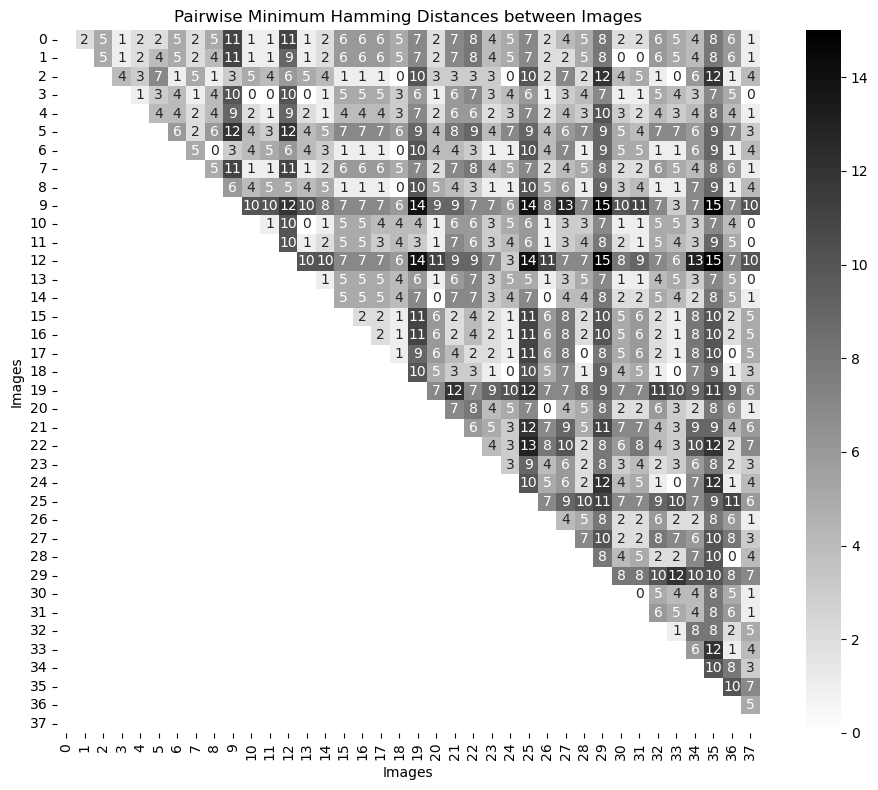

In [240]:
# Extract the keys (image pairs) and convert the pairwise distances into a matrix
keys = list(set([key[0] for key in pairwise_hamming_distances.keys()] + 
                [key[1] for key in pairwise_hamming_distances.keys()]))
distance_matrix = np.zeros((len(keys), len(keys)))

# Fill the matrix with the pairwise distances
for (image_A, image_B), distance in pairwise_hamming_distances.items():
    i = keys.index(image_A)
    j = keys.index(image_B)
    distance_matrix[i, j] = distance
    distance_matrix[j, i] = distance  # Since Hamming distance is symmetric

# Mask the lower triangular part of the matrix (set NaN for lower triangle)
mask_lower = np.tril(np.ones_like(distance_matrix, dtype=bool), k=0)  # Mask lower triangle
distance_matrix[mask_lower] = np.nan  # Set lower triangle to NaN (no annotation)

# Plot the distance matrix as a heatmap with binary color map
plt.figure(figsize=(10, 8))

# Set the color map to 'binary' and annotate only for the lower triangle
sns.heatmap(distance_matrix, 
            #xticklabels=keys, #This labels the X-axis by Cryptographic hash and confusing
            #yticklabels=keys, #Same for Y-axis
            cmap="binary", 
            annot=True, 
            annot_kws={'size': 10}, 
            cbar=True, 
            mask=mask_lower, 
            square=True)

# Adding labels and title
plt.title("Pairwise Minimum Hamming Distances between Images")
plt.xlabel("Images")
plt.ylabel("Images")

# Show the plot
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Implementing Visulaization Using StreamLit to allow GUI

In [267]:
import streamlit as st
from io import BytesIO